In [22]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.impute import KNNImputer

np.random.seed(109)

(array([1525., 2527., 1613.,    4.,  160.,  163.,   44.,   21.,   10.,
           7.,    3.,    0.,    0.,    0.,    0.,  518.,  192.,  211.,
         214.,  229.,  239.,  257.,  247.,  315.,  304.,  278.,  294.,
         280.,  196.,   81.]),
 array([-22.0586758 , -20.60767123, -19.15666667, -17.7056621 ,
        -16.25465753, -14.80365297, -13.3526484 , -11.90164384,
        -10.45063927,  -8.9996347 ,  -7.54863014,  -6.09762557,
         -4.646621  ,  -3.19561644,  -1.74461187,  -0.29360731,
          1.15739726,   2.60840183,   4.05940639,   5.51041096,
          6.96141553,   8.41242009,   9.86342466,  11.31442922,
         12.76543379,  14.21643836,  15.66744292,  17.11844749,
         18.56945205,  20.02045662,  21.47146119]),
 <BarContainer object of 30 artists>)

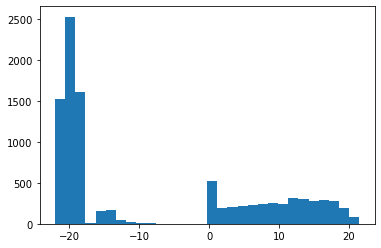

In [5]:
X_data = pd.read_csv('NHANESI_X.csv')
y_data = pd.read_csv('NHANESI_y.csv')

X_data = X_data.drop('Unnamed: 0', axis = 1)
y_data = y_data.drop('Unnamed: 0', axis = 1)

plt.hist(x=y_data.values, bins=30)

In [6]:
y_data['y'] = (abs(y_data['y'])>=18)*1

print(y_data['y'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2,  random_state = 109, shuffle=True, stratify=y_data['y']
)

print(X_data.shape)
print(y_data.shape)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

1    6048
0    3884
Name: y, dtype: int64
(9932, 18)
(9932, 1)
(7945, 18) (1987, 18)
(7945, 1) (1987, 1)


In [9]:
print("X_data # of null values for each predictor:")
print(X_data[X_data.isnull().any(axis=1)].count())
print("\ny_data # of null values for the prediction:")
print(y_data[y_data.isnull().any(axis=1)].count())

print(X_data.columns)
print(y_data.columns)



X_data # of null values for each predictor:
Age                   1339
Diastolic BP          1281
Poverty index         1339
Race                  1339
Red blood cells       1339
Sedimentation rate     513
Serum Albumin         1339
Serum Cholesterol     1339
Serum Iron            1339
Serum Magnesium       1339
Serum Protein         1339
Sex                   1339
Systolic BP           1282
TIBC                  1339
TS                    1339
White blood cells      298
BMI                   1339
Pulse pressure        1280
dtype: int64

y_data # of null values for the prediction:
y    0
dtype: int64
Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')
Index(['y'], dtype='object')


In [10]:
#X_data_dropped = X_data.dropna()
#y_data_dropped = y_data.dropna()
combined = pd.concat([X_data, y_data], axis = 1)
print(combined.shape)

combined_dropped = combined.dropna()

print(combined_dropped.shape)

X_data_dropped = combined_dropped[['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure']]
y_data_dropped = combined_dropped[['y']]

print(X_data_dropped.shape)
print(y_data_dropped.shape)


#knn imputer.fit
#choose number of transmitter


(9932, 19)
(8593, 19)
(8593, 18)
(8593, 1)


In [11]:
# impute X_data with KNN imputer, n_neighbors = 1

imputer = KNNImputer(n_neighbors=1)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)
# print(imputer_result)
# print(type(imputer_result))

# turn it into a dataframe, rename columns
X_train_impute = pd.DataFrame(X_train_imputed, columns = X_data.columns)
X_test_impute = pd.DataFrame(X_test_imputed, columns = X_data.columns)

y_train = pd.DataFrame(y_train.values, columns = y_data.columns)
y_test = pd.DataFrame(y_test.values, columns = y_data.columns)

train_imputed = pd.concat([X_train_impute, y_train], axis = 1)
test_imputed = pd.concat([X_test_impute, y_test], axis = 1)

train_imputed.head()

,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure,y
0,74.0,80.0,120.0,1.0,44.8,6.0,4.2,239.0,51.0,1.52,7.4,2.0,180.0,424.0,12.0,7.0,25.665631,100.0,0
1,58.0,100.0,999.0,1.0,48.6,9.0,4.7,242.0,108.0,1.97,6.8,1.0,150.0,336.0,32.1,5.2,26.462807,50.0,1
2,44.0,70.0,301.0,2.0,43.8,31.0,4.3,222.0,121.0,1.57,7.3,2.0,120.0,349.0,34.7,6.6,23.574536,50.0,1
3,71.0,75.0,100.0,1.0,44.9,23.0,4.5,259.0,85.0,1.43,7.4,1.0,180.0,321.0,26.5,7.5,24.201035,105.0,0
4,59.0,78.0,283.0,1.0,77.7,4.0,4.1,247.0,170.0,1.74,7.2,1.0,132.0,356.0,47.8,8.9,29.940744,54.0,1


In [12]:
X_train_impute.columns

Index(['Age', 'Diastolic BP', 'Poverty index', 'Race', 'Red blood cells',
       'Sedimentation rate', 'Serum Albumin', 'Serum Cholesterol',
       'Serum Iron', 'Serum Magnesium', 'Serum Protein', 'Sex', 'Systolic BP',
       'TIBC', 'TS', 'White blood cells', 'BMI', 'Pulse pressure'],
      dtype='object')

In [13]:
train_sex = X_train_impute['Sex'].subtract(1)
X_train_impute['Sex'] = train_sex

test_sex = X_test_impute['Sex'].subtract(1)
X_test_impute['Sex'] = test_sex

train_race = X_train_impute['Race'].subtract(1)
X_train_impute['Race'] = train_race

test_race = X_test_impute['Race'].subtract(1)
X_test_impute['Race'] = test_race

In [14]:
X_train_impute.head()



,Age,Diastolic BP,Poverty index,Race,Red blood cells,Sedimentation rate,Serum Albumin,Serum Cholesterol,Serum Iron,Serum Magnesium,Serum Protein,Sex,Systolic BP,TIBC,TS,White blood cells,BMI,Pulse pressure
0,74.0,80.0,120.0,0.0,44.8,6.0,4.2,239.0,51.0,1.52,7.4,1.0,180.0,424.0,12.0,7.0,25.665631,100.0
1,58.0,100.0,999.0,0.0,48.6,9.0,4.7,242.0,108.0,1.97,6.8,0.0,150.0,336.0,32.1,5.2,26.462807,50.0
2,44.0,70.0,301.0,1.0,43.8,31.0,4.3,222.0,121.0,1.57,7.3,1.0,120.0,349.0,34.7,6.6,23.574536,50.0
3,71.0,75.0,100.0,0.0,44.9,23.0,4.5,259.0,85.0,1.43,7.4,0.0,180.0,321.0,26.5,7.5,24.201035,105.0
4,59.0,78.0,283.0,0.0,77.7,4.0,4.1,247.0,170.0,1.74,7.2,0.0,132.0,356.0,47.8,8.9,29.940744,54.0


In [15]:
# Baseline KNN regression model on dropped data
baseline_kNN_model = KNeighborsClassifier(n_neighbors=len(X_train_impute)).fit(X_train_impute,y_train.values.ravel())
    
y_pred = baseline_kNN_model.predict(X_test_impute)

baseline_kNN_model_accuracy = mean_squared_error(y_pred,y_test)
print(baseline_kNN_model_accuracy)

0.3910417715148465


In [16]:
# Logistic regression model on dropped data
logit_base = LogisticRegression(max_iter=10000).fit(X_train_impute,y_train.values.ravel())
y_pred = logit_base.predict(X_test_impute)

logit_base_test_accuracy = accuracy_score(y_pred,y_test)
print(logit_base_test_accuracy)

0.7564167086059386


In [ ]:
# Logistic Regression with Lasso Regularization - Ray

In [ ]:
# Cross-Validated kNN Classification - Vineet
# include plots of training and validation accuracy maybe

In [ ]:
# Cross-Validated Logistic Regression with Lasso Regularization - Ray

In [ ]:
# Cross-Validated Logistic Regression with Ridge Regularization - Ray

In [ ]:
# Single Decision Tree Cross-Validated for parameters - Leonard

In [ ]:
# Bagging - Leonard

In [ ]:
# Boosting - Vineet

In [24]:
# Random Forest - Sean
# grid search with 5-fold cross-validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

hyperF = dict(n_estimators = [500], max_depth = [5, 8, 15, 25, 35],
             min_samples_split = [2, 5, 10, 15, 50],
             min_samples_leaf = [1, 2, 5, 10])
gridF = GridSearchCV(RandomForestClassifier(random_state = 69), hyperF, cv = 5, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train_impute, y_train.values.ravel())
bestF.best_estimator_

# should get min_samples_split = 50, max_depth = 15, min_samples_leaf default?

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.6min finished


In [29]:
# fit the random forest with extracted hyperparameters
rf = RandomForestClassifier(n_estimators = 500, max_depth = 15, min_samples_split = 50, random_state = 69)
rf.fit(X_train_impute, y_train.values.ravel())

# test accuracy
y_pred = rf.predict(X_test_impute)
rf_test_accuracy = accuracy_score(y_pred, y_test)

In [31]:
print(f"random forest test accuracy is {rf_test_accuracy}")

random forest test accuracy is 0.7533970810266734


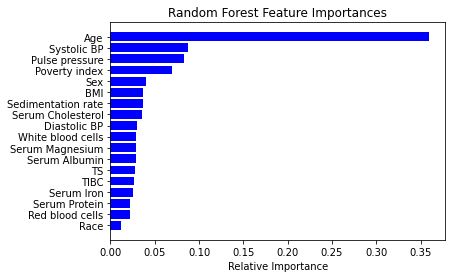

In [38]:
features = X_train_impute.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title("Random Forest Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "b", align = "center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Neural net to compare maybe at end if feeling frisky